In [1]:
import numpy
print(numpy.__version__)
import networkx
print(networkx.__version__)

from nilmtk.api import API
import warnings

warnings.filterwarnings("ignore")
from nilmtk.disaggregate import DM_SDA, GaterSGN, SGN, DM_GATE2
import nilmtk.utils as utils

1.24.3
2.8.4


In [2]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
# import pytorch_lightning as pl

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

# from src import *

USE_GPU = True
device = torch.device("cuda:0" if USE_GPU and torch.cuda.is_available() else "cpu")
print(torch.__version__, device)

2.0.1 cuda:0


DM_GATE2
Started training for  DM_GATE2
Joint training for  DM_GATE2
............... Loading Data for training ...................
Loading data for  redd  dataset
Loading building ...  3
Loading data for meter ElecMeterID(instance=1, building=3, dataset='REDD')     {'fill_method': None, 'how': 'mean'}
Loading data for meter ElecMeterID(instance=2, building=3, dataset='REDD')     {'fill_method': None, 'how': 'mean'}

Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=13, building=3, dataset='REDD')     {'fill_method': None, 'how': 'mean'}
Loading data for meter ElecMeterID(instance=14, building=3, dataset='REDD')     {'fill_method': None, 'how': 'mean'}

Done loading data all meters for this chunk.
Dropping missing values
Train Jointly
Loading transfer data for  redd  dataset
Loading building ...  3
Loading data for meter ElecMeterID(instance=1, building=3, dataset='REDD')     {'fill_method': None, 'how': 'mean'}
Loading data for meter ElecMeterID(i

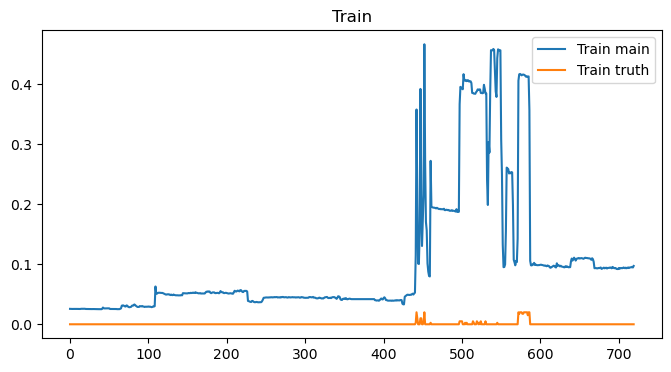

First model training for washing machine
Is Time embed used ?  True
Unet dims: [2, 64, 128, 256, 512] [(2, 64), (64, 128), (128, 256), (256, 512)]
Loaded from ./washing machine_ukdale_dm_g2_best_state_dict.pt
Finished training for  DM_GATE2
Joint Testing for all algorithms
Loading data for  redd  dataset
Loading data for meter ElecMeterID(instance=1, building=3, dataset='REDD')     {'fill_method': None, 'how': 'mean'}
Loading data for meter ElecMeterID(instance=2, building=3, dataset='REDD')     {'fill_method': None, 'how': 'mean'}

Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=13, building=3, dataset='REDD')     {'fill_method': None, 'how': 'mean'}
Loading data for meter ElecMeterID(instance=14, building=3, dataset='REDD')     {'fill_method': None, 'how': 'mean'}

Done loading data all meters for this chunk.
Dropping missing values
Generating predictions for : DM_GATE2
Start dm disaggregating
Disaggregating washing machine
test main (156960, 

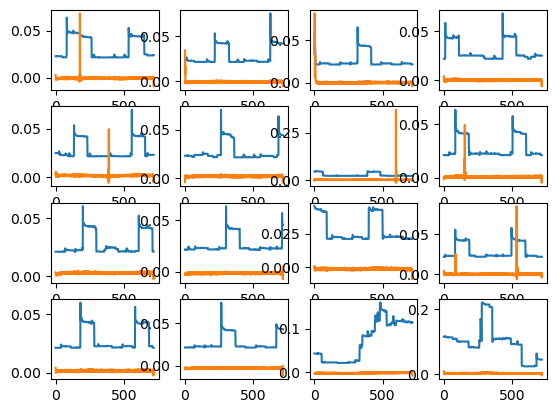

Inference Time consumption: 5.412416458129883s.
washing machine prediction done, computing results
length 156845 156845 156845


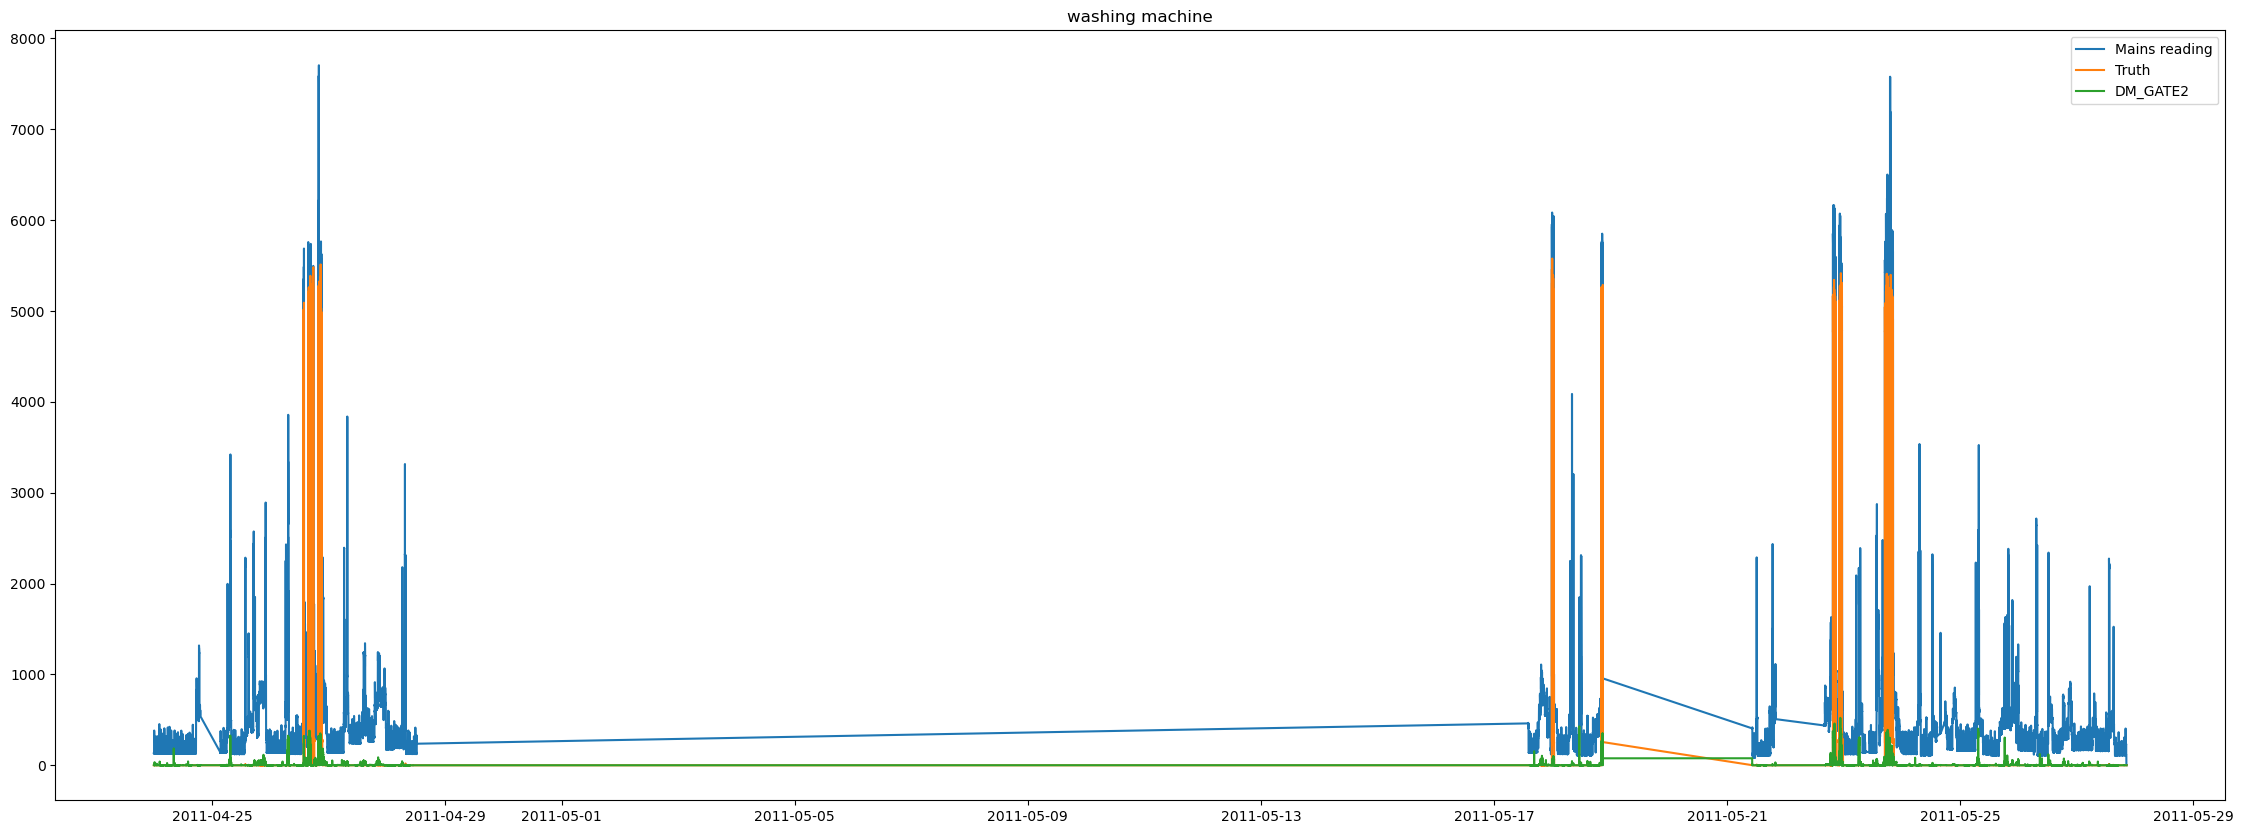

............  accuracy  ..............
                 DM_GATE2
washing machine  0.961146
............  f1score  ..............
                 DM_GATE2
washing machine  0.561393
............  mae  ..............
                  DM_GATE2
washing machine  90.085373
............  sae  ..............
                  DM_GATE2
washing machine  89.844616
............  precision  ..............
                 DM_GATE2
washing machine  0.593066
............  recall  ..............
                 DM_GATE2
washing machine  0.532932
............  nep  ..............
                 DM_GATE2
washing machine  0.994532
............  MCC  ..............
                 DM_GATE2
washing machine  0.541973


In [3]:
DATASET_NAME = 'redd'
HOUSE = 3
TUNE = False

if HOUSE == 1:
    TRAIN = {
        1: {
            'start_time': '2011-04-19',
            'end_time': '2011-04-26'
        },
    }
    TEST = {
        1: {
            'start_time': '2011-04-26',
            'end_time': '2011-05-24'
        },
    }
elif HOUSE == 2:
    TRAIN = {
        2: {
            'start_time': '2011-04-18',
            'end_time': '2011-04-25'
        },
    }
    TEST = {
        2: {
            'start_time': '2011-04-25',
            'end_time': '2011-05-22'
        },
    }
elif HOUSE == 3:
    TRAIN = {
        3: {
            'start_time': '2011-04-17',
            'end_time': '2011-04-24'
        },
    }
    TEST = {
        3: {
            'start_time': '2011-04-24',
            'end_time': '2011-05-30'
        },
    }
else:
    raise NameError

e = {
    # Specify power type, sample rate and disaggregated appliance
    'power': {
        'mains_train': ['apparent'],
        'mains_transfer': ['apparent'],
        'mains_test': ['apparent'],
                
        # 'appliance': ['active']
        # 'mains': ['apparent'],  # problem: ukdale active, redd apparent
        'appliance': ['active'],
    },
    'sample_rate': 6,
    'appliances': ['washing machine'],
    # 'appliances': ['dish washer'],
    # Universally no pre-training
    'pre_trained': False,
    "app_meta": utils.APP_META[DATASET_NAME],
    # Specify algorithm hyper-parameters
    # 'gater': 
    #     # "GaterSGN": GaterSGN(
    #     # {'n_epochs': 10, 'batch_size': 256, 'test_only': False}),
    #     SGN({'n_epochs': 5, 'batch_size': 256, 'test_only': True, 'gate_only': True, 'note': 'ukdale'})
    #     ,
    'save_note': f'ft-{HOUSE}' if TUNE else f'ft-{HOUSE}-no',
    'methods': {
        "DM_GATE2": DM_GATE2(
            {'n_epochs': 1, 'batch_size': 64, 'sequence_length': 720, 'overlapping_step': 10,
            'test_only': True, 'fine_tune': TUNE, 'src_rate': 0.0, 'lr': 5e-6, "sampler": "ddim", "patience": 3,
            'freeze': True,
            "app_meta": utils.APP_META[DATASET_NAME], 'filter_train': False, 'note': DATASET_NAME, 'load_from': 'ukdale'})
         },
    # Specify train and test data
    'train': {
        'datasets': {
            # 'ukdale': {
            #     'path': 'mnt/ukdale.h5',
            #     'buildings': {
            #         1: {
            #             'start_time': '2013-05-31',
            #             'end_time': '2013-08-31'
            #         },
            #         5: {
            #             'start_time': '2014-07-01',
            #             'end_time': '2014-09-05'
            #         },
            #     }
            # },
            'redd': {
                'path': 'mnt/redd.h5',
                'buildings': TRAIN
            },
        }
    },
    'transfer': {
        'datasets': {
            'redd': {
                'path': 'mnt/redd.h5',
                'buildings': TRAIN
            },
        },
    },
    'test': {
        'datasets': {
            'redd': {
                'path': 'mnt/redd.h5',
                'buildings': TEST
            },
        },
        # Specify evaluation metrics
        'metrics': ['accuracy', 'f1score', 'mae', 'sae', 'precision', 'recall', 'nep', 'MCC']
    }
}

API(e)